# Calculate Well Trajectory

Calculate the well trajectory points from a json document with only 
wellname, md, inc, azim, and surface latitude and longitude or surface x and y.

Directional surveys come in a variety of formats, these formats are often missing critical information the user needs for their analysis. The welltrajconvert package allows the user to take the bare minimum required wellbore survey information and convert that into its latitude and longitude points along the wellbore and a host of other common parameters.

welltrajconvert requires the wellId, measured depth, inclination angle, azimuth degrees, surface_latitude, and surface_longitude points or surface x and y points to calculate various points along the wellbore using a minimum curvature algorithm.

**welltrajconvert calculates the following:**

* **tvd:**
    * true vertical depth from surface to the survey point.
* **n_s_deviation:**
    * north south deviation for each point in the wellbore path.
* **e_w_deviation:**
    * east west deviation for each point in the wellbore path.
* **dls:**
    * Dogleg severity is a measure of the change in direction of a wellbore over a defined length, measured in degrees per 100 feet of length.
* **surface_x:**
    * Surface Easting component of the UTM coordinate
* **surface_y:**
    * Surface Northing component of the UTM coordinate
* **x_points:**
    * Easting component of the UTM coordinate
* **y_points:**
    * Northing component of the UTM coordinate
* **zone_number:**
    * Zone number of the UTM coordinate
* **zone_letter:**
    * Zone letter of the UTM coordinate
* **latitude_points:**
    * The latitude value of a location in the borehole. A positive value denotes north. Angle subtended with equatorial plane by a perpendicular from a point on the surface of a spheriod.
* **longitude_points:**
    * The longitude value of a location in a borehole. A positive value denotes east. Angle measured about the spheroid axis from a local prime meridian to the meridian through the point.
* **isHorizontal:**
    * Array of strings, Vertical Or Horizontal depending on Inclination angle point.


In [1]:
import os
from pathlib import Path
current_dir = Path.cwd()
path = current_dir.parent
print(path)
#change directory to get src class data
os.chdir(path)

current_dir = Path.cwd()
path = current_dir.parent
print(path)
#change directory to get src class data
os.chdir(path)

current_dir = Path.cwd()
path = current_dir.parent
print(path)
#change directory to get src class data
os.chdir(path)

C:\Users\BpAmos\Documents\repos\directional-survey-converter\docs\source
C:\Users\BpAmos\Documents\repos\directional-survey-converter\docs
C:\Users\BpAmos\Documents\repos\directional-survey-converter


In [2]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from welltrajconvert.wellbore_trajectory import *

## Get Wellbore Trajectory object

get the path to the json file

In [4]:
json_path = './wellbore_survey.json'

json_path = 'C:/Users/BpAmos/Documents/repos/directional-survey-converter/docs/source/notebook/data/wellbore_survey.json'

json_path

'C:/Users/BpAmos/Documents/repos/directional-survey-converter/docs/source/notebook/data/wellbore_survey.json'

Open the json, just to take a look at it. the `from_json()` takes care of this

In [5]:
with open(json_path) as json_file:
    json_obj = json.load(json_file)
json_file.close()
# take a look at the json
#print(json.dumps(json_obj, indent=4))


using the WellboreTrajectory class, use `from_json` to take the path and convert it to a deviation survey object. This step will validate if the json contains the correct data for the minimum curvature calculation.

**Create Wellbore_Survey_Object:**

In [6]:
# create a wellbore deviation object from the json path
dev_obj = WellboreTrajectory.from_json(json_path)
# take a look at the data
dev_obj.deviation_survey_obj

DeviationSurvey(wellId='well_C', md=array([    0.  ,    35.  ,   774.81,   800.  ,   900.  ,  1000.  ,
        1100.  ,  1200.  ,  1300.  ,  1400.  ,  1500.  ,  1600.  ,
        1700.  ,  1800.  ,  1900.  ,  2000.  ,  2100.  ,  2200.  ,
        2300.  ,  2400.  ,  2500.  ,  2600.  ,  2700.  ,  2800.  ,
        2900.  ,  3000.  ,  3100.  ,  3200.  ,  3300.  ,  3400.  ,
        3500.  ,  3600.  ,  3700.  ,  3800.  ,  3900.  ,  4000.  ,
        4100.  ,  4200.  ,  4300.  ,  4400.  ,  4500.  ,  4600.  ,
        4700.  ,  4800.  ,  4900.  ,  5000.  ,  5100.  ,  5200.  ,
        5300.  ,  5400.  ,  5500.  ,  5600.  ,  5700.  ,  5800.  ,
        5900.  ,  6000.  ,  6100.  ,  6200.  ,  6300.  ,  6400.  ,
        6450.67,  6532.  ,  6625.  ,  6720.  ,  6813.  ,  6909.  ,
        7002.  ,  7098.  ,  7191.  ,  7286.  ,  7379.  ,  7475.  ,
        7569.  ,  7663.  ,  7758.  ,  7851.  ,  7947.  ,  8040.  ,
        8135.  ,  8229.  ,  8324.  ,  8418.  ,  8512.  ,  8606.  ,
        8700.  ,  8794.  ,

As you can see above, there is only input data for wellId, md, inc, azim, and surface latitude and longitude.
The rest of the data is missing and needs to be calculated.

**Calculate Survey Points:**

In [7]:
# now you can calculate the survey points using a minimum curvature algorithm
dev_obj.calculate_survey_points()
# take a look at the data that was just calculated
dev_obj.deviation_survey_obj

DeviationSurvey(wellId='well_C', md=array([    0.  ,    35.  ,   774.81,   800.  ,   900.  ,  1000.  ,
        1100.  ,  1200.  ,  1300.  ,  1400.  ,  1500.  ,  1600.  ,
        1700.  ,  1800.  ,  1900.  ,  2000.  ,  2100.  ,  2200.  ,
        2300.  ,  2400.  ,  2500.  ,  2600.  ,  2700.  ,  2800.  ,
        2900.  ,  3000.  ,  3100.  ,  3200.  ,  3300.  ,  3400.  ,
        3500.  ,  3600.  ,  3700.  ,  3800.  ,  3900.  ,  4000.  ,
        4100.  ,  4200.  ,  4300.  ,  4400.  ,  4500.  ,  4600.  ,
        4700.  ,  4800.  ,  4900.  ,  5000.  ,  5100.  ,  5200.  ,
        5300.  ,  5400.  ,  5500.  ,  5600.  ,  5700.  ,  5800.  ,
        5900.  ,  6000.  ,  6100.  ,  6200.  ,  6300.  ,  6400.  ,
        6450.67,  6532.  ,  6625.  ,  6720.  ,  6813.  ,  6909.  ,
        7002.  ,  7098.  ,  7191.  ,  7286.  ,  7379.  ,  7475.  ,
        7569.  ,  7663.  ,  7758.  ,  7851.  ,  7947.  ,  8040.  ,
        8135.  ,  8229.  ,  8324.  ,  8418.  ,  8512.  ,  8606.  ,
        8700.  ,  8794.  ,

As you can see above, the data for latitude, longitude points and various other points along the wellbore have been calculated. 

**Serialize Dict:**

In [8]:
# finally, you can serialize the data object back to a json string to export or be used in a other applications.
json_ds = dev_obj.serialize()
json_ds

'{"wellId": "well_C", "md": [0.0, 35.0, 774.81, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0, 2400.0, 2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.0, 3100.0, 3200.0, 3300.0, 3400.0, 3500.0, 3600.0, 3700.0, 3800.0, 3900.0, 4000.0, 4100.0, 4200.0, 4300.0, 4400.0, 4500.0, 4600.0, 4700.0, 4800.0, 4900.0, 5000.0, 5100.0, 5200.0, 5300.0, 5400.0, 5500.0, 5600.0, 5700.0, 5800.0, 5900.0, 6000.0, 6100.0, 6200.0, 6300.0, 6400.0, 6450.67, 6532.0, 6625.0, 6720.0, 6813.0, 6909.0, 7002.0, 7098.0, 7191.0, 7286.0, 7379.0, 7475.0, 7569.0, 7663.0, 7758.0, 7851.0, 7947.0, 8040.0, 8135.0, 8229.0, 8324.0, 8418.0, 8512.0, 8606.0, 8700.0, 8794.0, 8859.0, 8924.0, 9018.0, 9112.0, 9206.0, 9292.0, 9386.0, 9481.0, 9574.0, 9669.0, 9764.0, 9858.0, 9952.0, 10047.0, 10142.0, 10236.0, 10330.0, 10424.0, 10517.0, 10613.0, 10707.0, 10802.0, 10851.0, 10890.0], "inc": [0.0, 0.0, 0.46, 0.13, 0.57, 0.49, 0.29, 0.6, 0.53, 0.83, 0.61, 0.87, 1.17, 1.

Now you have done it, you can check out your calculated points in a dataframe for easy viewing.

In [9]:
json_ds_obj = json.loads(json_ds)
df = pd.DataFrame(json_ds_obj)
df.head()

,wellId,md,inc,azim,tvd,e_w_deviation,n_s_deviation,dls,surface_latitude,surface_longitude,longitude_points,latitude_points,zone_number,zone_letter,x_points,y_points,surface_x,surface_y,isHorizontal
0,well_C,0.00,0.00,227.11,0.000000,0.000000e+00,0.000000e+00,0.000000,29.908294,47.688521,47.688524,29.908294,38,R,759587.934440,3.311662e+06,759587.93444,3.311662e+06,Vertical
1,well_C,35.00,0.00,227.11,35.000000,-1.484001e-17,-1.378531e-17,0.000000,29.908294,47.688521,47.688524,29.908294,38,R,759587.934440,3.311662e+06,759587.93444,3.311662e+06,Vertical
2,well_C,774.81,0.46,227.11,774.802052,-2.175842e+00,-2.021203e+00,0.062178,29.908294,47.688521,47.688517,29.908289,38,R,759587.271243,3.311661e+06,759587.93444,3.311662e+06,Vertical
3,well_C,800.00,0.13,163.86,799.991684,-2.241984e+00,-2.117474e+00,1.312323,29.908294,47.688521,47.688516,29.908289,38,R,759587.251083,3.311661e+06,759587.93444,3.311662e+06,Vertical
4,well_C,900.00,0.57,230.43,899.989571,-2.593878e+00,-2.543311e+00,0.439221,29.908294,47.688521,47.688515,29.908288,38,R,759587.143826,3.311661e+06,759587.93444,3.311662e+06,Vertical


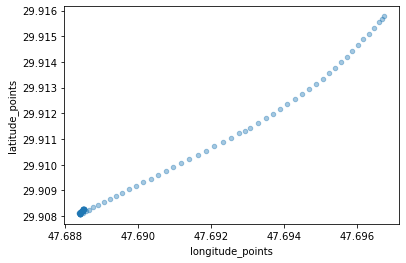

In [10]:
df.plot(kind="scatter", x="longitude_points", y="latitude_points", alpha=0.4)
plt.show()

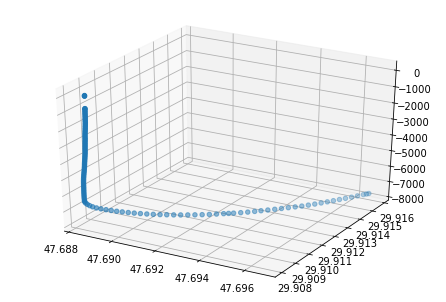

In [11]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(df['longitude_points'].values, df['latitude_points'].values, df['tvd'].values*-1)
pyplot.show()

In [12]:
# Finished

## Calculate From WellId, MD, INC, AZIM and Suface X,Y

Sometimes the latitue and longitude coordinates are not provided.

In the case that only X,Y surface coordinates are provided you can still calculate the survey points with
one additional step. 

The user must find the CRS coordinate system and provide that in the calculation.

* **Transformation Tested with latitude and longitude points error less than 0.001%**

In [17]:
# get data that has only surface x and y, wellid, md, inc, azim
json_path = 'C:/Users/BpAmos/Documents/repos/directional-survey-converter/docs/source/notebook/data/well_export.json'

In [18]:
with open(json_path) as json_file:
    json_obj = json.load(json_file)
json_file.close()
#create a dict that has only the surface x and y
well_dict = {'wellId':json_obj['wellId'],
             'md':json_obj['md'],
            'inc':json_obj['inc'],
            'azim':json_obj['azim'],
            'surface_x':json_obj['surface_x'],
            'surface_y':json_obj['surface_y']}
#well_dict

Since we already have a dictionary created, we do not need the `from_json`
Enter the dict into the `WellboreTrajectory(data)`

In [19]:
# import dict data
well_obj = WellboreTrajectory(data = well_dict)
well_obj.deviation_survey_obj

DeviationSurvey(wellId='well_C', md=array([    0.  ,    35.  ,   774.81,   800.  ,   900.  ,  1000.  ,
        1100.  ,  1200.  ,  1300.  ,  1400.  ,  1500.  ,  1600.  ,
        1700.  ,  1800.  ,  1900.  ,  2000.  ,  2100.  ,  2200.  ,
        2300.  ,  2400.  ,  2500.  ,  2600.  ,  2700.  ,  2800.  ,
        2900.  ,  3000.  ,  3100.  ,  3200.  ,  3300.  ,  3400.  ,
        3500.  ,  3600.  ,  3700.  ,  3800.  ,  3900.  ,  4000.  ,
        4100.  ,  4200.  ,  4300.  ,  4400.  ,  4500.  ,  4600.  ,
        4700.  ,  4800.  ,  4900.  ,  5000.  ,  5100.  ,  5200.  ,
        5300.  ,  5400.  ,  5500.  ,  5600.  ,  5700.  ,  5800.  ,
        5900.  ,  6000.  ,  6100.  ,  6200.  ,  6300.  ,  6400.  ,
        6450.67,  6532.  ,  6625.  ,  6720.  ,  6813.  ,  6909.  ,
        7002.  ,  7098.  ,  7191.  ,  7286.  ,  7379.  ,  7475.  ,
        7569.  ,  7663.  ,  7758.  ,  7851.  ,  7947.  ,  8040.  ,
        8135.  ,  8229.  ,  8324.  ,  8418.  ,  8512.  ,  8606.  ,
        8700.  ,  8794.  ,

As you can see above, no surface latitude and longitude are provided. Only the surface X and Y.

**CRS Transformation:**
Since we are only given surface x and y we must translate this to the WGS:84 projection system.
To do this use `crs_transform()` and enter in the EPSG coordinate system.

Find your CRS here: https://epsg.io/

In [20]:
# must import crs transform string
well_obj.crs_transform(crs_in='epsg:32638')

**Calculate Survey Points:**

In [21]:
well_obj.calculate_survey_points()
# check out object
well_obj.deviation_survey_obj

DeviationSurvey(wellId='well_C', md=array([    0.  ,    35.  ,   774.81,   800.  ,   900.  ,  1000.  ,
        1100.  ,  1200.  ,  1300.  ,  1400.  ,  1500.  ,  1600.  ,
        1700.  ,  1800.  ,  1900.  ,  2000.  ,  2100.  ,  2200.  ,
        2300.  ,  2400.  ,  2500.  ,  2600.  ,  2700.  ,  2800.  ,
        2900.  ,  3000.  ,  3100.  ,  3200.  ,  3300.  ,  3400.  ,
        3500.  ,  3600.  ,  3700.  ,  3800.  ,  3900.  ,  4000.  ,
        4100.  ,  4200.  ,  4300.  ,  4400.  ,  4500.  ,  4600.  ,
        4700.  ,  4800.  ,  4900.  ,  5000.  ,  5100.  ,  5200.  ,
        5300.  ,  5400.  ,  5500.  ,  5600.  ,  5700.  ,  5800.  ,
        5900.  ,  6000.  ,  6100.  ,  6200.  ,  6300.  ,  6400.  ,
        6450.67,  6532.  ,  6625.  ,  6720.  ,  6813.  ,  6909.  ,
        7002.  ,  7098.  ,  7191.  ,  7286.  ,  7379.  ,  7475.  ,
        7569.  ,  7663.  ,  7758.  ,  7851.  ,  7947.  ,  8040.  ,
        8135.  ,  8229.  ,  8324.  ,  8418.  ,  8512.  ,  8606.  ,
        8700.  ,  8794.  ,

As you can see above, all the survey points have been calculated.

**Deserialize Dict:**

In [22]:
# serialize
json_ds = well_obj.serialize()
json_ds

'{"wellId": "well_C", "md": [0.0, 35.0, 774.81, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0, 2400.0, 2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.0, 3100.0, 3200.0, 3300.0, 3400.0, 3500.0, 3600.0, 3700.0, 3800.0, 3900.0, 4000.0, 4100.0, 4200.0, 4300.0, 4400.0, 4500.0, 4600.0, 4700.0, 4800.0, 4900.0, 5000.0, 5100.0, 5200.0, 5300.0, 5400.0, 5500.0, 5600.0, 5700.0, 5800.0, 5900.0, 6000.0, 6100.0, 6200.0, 6300.0, 6400.0, 6450.67, 6532.0, 6625.0, 6720.0, 6813.0, 6909.0, 7002.0, 7098.0, 7191.0, 7286.0, 7379.0, 7475.0, 7569.0, 7663.0, 7758.0, 7851.0, 7947.0, 8040.0, 8135.0, 8229.0, 8324.0, 8418.0, 8512.0, 8606.0, 8700.0, 8794.0, 8859.0, 8924.0, 9018.0, 9112.0, 9206.0, 9292.0, 9386.0, 9481.0, 9574.0, 9669.0, 9764.0, 9858.0, 9952.0, 10047.0, 10142.0, 10236.0, 10330.0, 10424.0, 10517.0, 10613.0, 10707.0, 10802.0, 10851.0, 10890.0], "inc": [0.0, 0.0, 0.46, 0.13, 0.57, 0.49, 0.29, 0.6, 0.53, 0.83, 0.61, 0.87, 1.17, 1.

Now you have done it, you can check out your calculated points in a dataframe for easy viewing.

In [23]:
json_ds_obj = json.loads(json_ds)
dfXY = pd.DataFrame(json_ds_obj)
dfXY.head()

,wellId,md,inc,azim,tvd,e_w_deviation,n_s_deviation,dls,surface_latitude,surface_longitude,longitude_points,latitude_points,zone_number,zone_letter,x_points,y_points,surface_x,surface_y,isHorizontal
0,well_C,0.00,0.00,227.11,0.000000,0.000000e+00,0.000000e+00,0.000000,29.908294,47.688521,47.688524,29.908294,38,R,759587.934461,3.311662e+06,759587.934461,3.311662e+06,Vertical
1,well_C,35.00,0.00,227.11,35.000000,-1.484001e-17,-1.378531e-17,0.000000,29.908294,47.688521,47.688524,29.908294,38,R,759587.934461,3.311662e+06,759587.934461,3.311662e+06,Vertical
2,well_C,774.81,0.46,227.11,774.802052,-2.175842e+00,-2.021203e+00,0.062178,29.908294,47.688521,47.688517,29.908289,38,R,759587.271264,3.311661e+06,759587.934461,3.311662e+06,Vertical
3,well_C,800.00,0.13,163.86,799.991684,-2.241984e+00,-2.117474e+00,1.312323,29.908294,47.688521,47.688516,29.908289,38,R,759587.251104,3.311661e+06,759587.934461,3.311662e+06,Vertical
4,well_C,900.00,0.57,230.43,899.989571,-2.593878e+00,-2.543311e+00,0.439221,29.908294,47.688521,47.688515,29.908288,38,R,759587.143847,3.311661e+06,759587.934461,3.311662e+06,Vertical


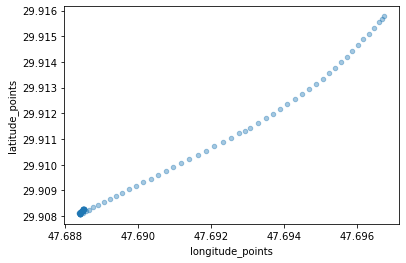

In [24]:
dfXY.plot(kind="scatter", x="longitude_points", y="latitude_points", alpha=0.4)
plt.show()

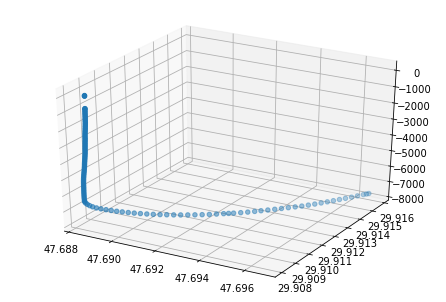

In [25]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(dfXY['longitude_points'].values, dfXY['latitude_points'].values, dfXY['tvd'].values*-1)
pyplot.show()

In [19]:
# Finished